In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from DecisionTree import TreeNode,DecisionTree
%matplotlib inline
import sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Task 4

Given training instances and their attributes,constructand plotthree decision trees 
ID3: informationgain(a.k.a., entropy based gain)
C4.5: gain ratio
CART: gini index

Question 1: We have(1) 6 training instances and 6 testing instances(2)3 attributes: (a) 2-value attribute (Home/Away), (b) 2-value attribute (In/Out), (c) 4-valueattribute (NBC/ESPN/FOX/ABC)

In [51]:
colNames = ('Is_Home_or_Away','Is_Opponent_In_AP25_Preseason','Media', 'Label')
gameTrainingSet = pd.read_csv('train-1.csv', dtype={i: 'category' for i in colNames})
gameTestingSet = pd.read_csv('test-1.csv', dtype={i: 'category' for i in colNames})

----------------------------------------------------------------------------------------------------------------

## ID3 Classifier

----------------------------------------------------------------------------------------------------------------

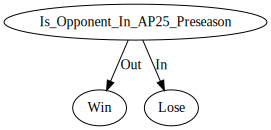

In [52]:
id3_classifier = DecisionTree(gameTrainingSet, colNames, algo=DecisionTree.ID3_ALGORITHM)
id3_classifier.fit()
id3_classifier.render()

In [53]:
y_id3 = (id3_classifier.predict(gameTestingSet) == 'Win').astype(np.int32)
y_id3

array([0, 1, 1, 0, 1, 0], dtype=int32)

----------------------------------------------------------------------------------------------------------------

## C4.5 Classifier

----------------------------------------------------------------------------------------------------------------

0.19087450462110933
0.6500224216483541
0.19087450462110933


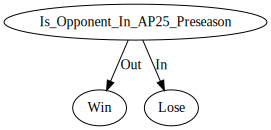

In [54]:
c45_classifier = DecisionTree(gameTrainingSet, colNames, algo=DecisionTree.C45_ALGORITHM)
c45_classifier.fit()
c45_classifier.render()

In [55]:
y_c45 = (c45_classifier.predict(gameTestingSet) == 'Win').astype(np.int32)
y_c45

array([0, 1, 1, 0, 1, 0], dtype=int32)

----------------------------------------------------------------------------------------------------------------

## CART Classifier

----------------------------------------------------------------------------------------------------------------

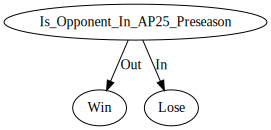

In [56]:
cart = DecisionTree(gameTrainingSet, colNames, algo=DecisionTree.CART_ALGORITHM)
cart.fit()
cart.render()

In [57]:
y_cart = (cart.predict(gameTestingSet) == 'Win').astype(np.int32)
y_cart

array([0, 1, 1, 0, 1, 0], dtype=int32)

----------------------------------------------------------------------------------------------------------------

Question 2: We have(1) 14 training instances and 1 testing instance(2) 4 attributes: 
(a) 3-value attribute (Sunny/Overcast/Rainy), 
(b) 3-value attribute(Hot/Mild/Cool), 
(c) 2-value attribute (High/Normal), 
(d) 2-value attribute (True/False)

----------------------------------------------------------------------------------------------------------------

In [58]:
weatherColName = ('Outlook', 'Temperature', 'Humidity', 'Windy', 'Label:Play?')
weatherTrainSet = pd.read_csv('weather_train.csv', dtype={i: 'category' for i in weatherColName})
weatherTestSet = pd.read_csv('weather_test.csv', dtype={i: 'category' for i in weatherColName})


----------------------------------------------------------------------------------------------------------------

## ID3 Classifier

----------------------------------------------------------------------------------------------------------------

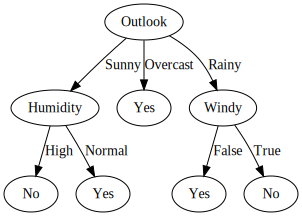

In [59]:
weather_ID3_classifier = DecisionTree(weatherTrainSet, weatherColName, algo=DecisionTree.ID3_ALGORITHM)
weather_ID3_classifier.fit()
weather_ID3_classifier.render()

In [60]:
y_ID3 = (weather_ID3_classifier.predict(weatherTestSet)=='Yes').astype(np.int32)
y_ID3

array([1], dtype=int32)

----------------------------------------------------------------------------------------------------------------

## C4.5 Classifier

----------------------------------------------------------------------------------------------------------------

0.24674981977443933
0.02922256565895487
0.15183550136234159
0.04812703040826949
0.01997309402197489
0.01997309402197489
0.9709505944546686
0.5709505944546686
0.9709505944546686


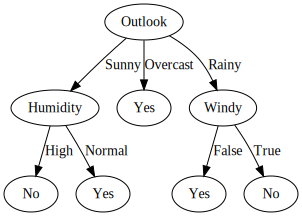

In [61]:
weather_C45_classifier = DecisionTree(weatherTrainSet, weatherColName, algo=DecisionTree.C45_ALGORITHM)
weather_C45_classifier.fit()
weather_C45_classifier.render()

In [62]:
y_C45 = (weather_C45_classifier.predict(weatherTestSet)=='Yes').astype(np.int32)
y_C45

array([1], dtype=int32)

----------------------------------------------------------------------------------------------------------------

## Cart Classifier

----------------------------------------------------------------------------------------------------------------

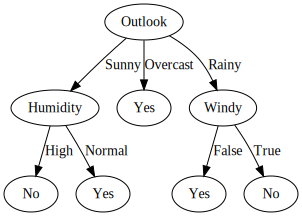

In [63]:
weather_cart_classifier = DecisionTree(weatherTrainSet, weatherColName, algo=DecisionTree.CART_ALGORITHM)
weather_cart_classifier.fit()
weather_cart_classifier.render()

In [64]:
y_cart = (weather_cart_classifier.predict(weatherTestSet)=='Yes').astype(np.int32)
y_cart

array([1], dtype=int32)

----------------------------------------------------------------------------------------------------------------

## Task 5

Given a university’s football game data for the last two seasons, please construct the two classification models ID3 and C4.5 to predict game results on games, and evaluate the model performance. 

DataoEach data object (or called instance) is a game. We have three attributes: 
(1) “Is Home/Away?”, a 2-value attribute (“Home”, “Away”), 
(2) “Is Opponent in AP Top 25 at Preseason?”, a 2-value attribute (“In”, “Out”), (3) “Media”, a 5-value attribute (“1-NBC”, “2-ESPN”, “3-FOX”, “4-ABC”, “5-CBS”). The label “Win/Lose” is binary (“Win”, “Lose”).•Training seto24 games. Please use game ID 1-24 to construct classification models. 

Testing seto12 games. Please use your classification models to predict labels of game ID 25-36 and evaluate the performanceof the classification models. •Predictive labelsoSuppose “Win” is the positive label and “Lose” is the negative label. Keep it in mind when you use Precision and Recall to evaluate the models. 

Stop criteria of decision treemodelsoWe stop splitting instances into child nodes when one of the criteria is satisfied: (1) All features have been used;(2) Information Gain or Gain Ratio will be zero with any feature that has not yet been used. 

Prediction criteriaoIf the node is not pure, we use the majority of this node forprediction: For example, if we have 5 positives and 1 negatives, we predict the testing case at 
this node to be a positive. (2) If the node has a balance (half/half labels), e.g., 2 positives and 2 negatives, we use the majority of the rootnode (the entire dataset) for prediction.

----------------------------------------------------------------------------------------------------------------

Question 1: ID3 modelis a decision tree model using “Information Gain”

(1) Programming(implementation from scratch is not required): Use ID3 to construct a decision tree based on the training set (24 games). Use the tree to predict labels of instances in the testing set (12 games) based on their attributes. Calculate Accuracy, Precision, Recall, and F1 score on the testing result.

(2) Attach a figure of your decision tree (either hand-or electronically drawn) and write down prediction label of the 12 testing games as well as evaluation result in the PDF.

----------------------------------------------------------------------------------------------------------------

In [65]:
def accuracyCheck(name, y, y_pred):
    headers = {
        'Accuracy': accuracy_score, 
        'F1 Score': f1_score, 
        'Precision': precision_score, 
        'Recall': recall_score
    }
    
    with open('{}.csv'.format(name), 'w') as summary:
        print(','.join(headers.keys()), file=summary)
        summary.write(','.join(['{:3.3f}'.format(metric(y, y_pred)) for metric in headers.values()]))


In [66]:
gameTrainingSet2 = pd.read_csv('train_2.csv', dtype={k: 'category' for k in colNames})
gameTestingSet2 = pd.read_csv('test_2.csv', dtype={k: 'category' for k in colNames})


In [67]:
originalY = (np.array(gameTestingSet2['Label'], dtype=np.object) == 'Win').astype(np.int32)
originalY

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int32)

----------------------------------------------------------------------------------------------------------------

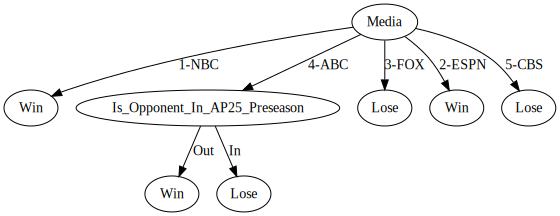

In [68]:
gameID3classifier2 = DecisionTree(gameTrainingSet2, colNames, algo=DecisionTree.ID3_ALGORITHM)
gameID3classifier2.fit()
gameID3classifier2.render()

In [69]:
y_ID3 = (gameID3classifier2.predict(gameTestingSet2)=='Win').astype(np.int32)
y_ID3

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int32)

In [70]:
accuracyCheck('Actual_vs_Pred_ID3',originalY,y_ID3)
fileID3 = pd.read_csv('Actual_vs_Pred_ID3.csv')
fileID3.head()

,Accuracy,F1 Score,Precision,Recall
0,0.833,0.889,0.889,0.889


## Ans: - 
## ID3 Accuracy - 0.833
## ID3 F1 Score - 0.889
## ID3 Precision - 0.889
## ID3 Recall - 0.889

----------------------------------------------------------------------------------------------------------------

Question 2: C4.5 modelis a decision tree model using “Gain Ratio”

(1) Programming(implementation from scratch is not required): Use C4.5 to construct a decision tree based on the training set (24 games). Use the tree to predict labels of instances in the testing set (12 games) based on their attributes. Calculate Accuracy, Precision, Recall, and F1 score on the testing result.

(2)Attach a figure of your decision tree (either hand-or electronically drawn) and write down prediction label of the 12 testing games as well as evaluation result in the PDF.

0.034280337927763416
0.10905534839567366
0.1890235519772947
0.2916919971380596
0.2916919971380596
0.0


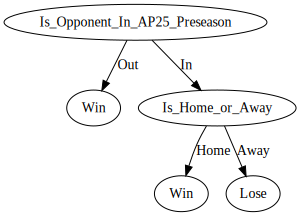

In [71]:
gameC45classifier2 = DecisionTree(gameTrainingSet2, colNames, algo=DecisionTree.C45_ALGORITHM)
gameC45classifier2.fit()
gameC45classifier2.render()

In [72]:
y_C45 = (gameC45classifier2.predict(gameTestingSet2)=='Win').astype(np.int32)
y_C45

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int32)

In [73]:
accuracyCheck('Actual_vs_Pred_C45',originalY,y_C45)
fileC45 = pd.read_csv('Actual_vs_Pred_C45.csv')
fileC45.head()

,Accuracy,F1 Score,Precision,Recall
0,0.917,0.947,0.9,1.0


## Ans: - 
## C45 Accuracy - 0.917
## C45 F1 Score - 0.947
## C45 Precision - 0.9
## C45 Recall - 1.0

Question 3: which model is the best;which model performs the worst? Can you explain why? 

As per the above observation, the model C4.5 performs better as compared to the ID3; C4.5 has a better accuracy score. As the ID3 only works better with categorical data, while C4.5 works well with both numeric and categorical data. 